In [1]:
%%javascript
function toggler(){
    if(window.already_toggling){
        // Don't add multiple buttons.
        return 0
    }
    let btn = $('.input').append('<button>Toggle Code</button>')
        .children('button');
    btn.on('click', function(e){
        let tgt = e.currentTarget;
        $(tgt).parent().children('.inner_cell').toggle()
    })
    window.already_toggling = true;
}
// Since javascript cells are executed as soon as we load
// the notebook (if it's trusted), and this cell might be at the
// top of the notebook (so is executed first), we need to
// allow time for all of the other code cells to load before
// running. Let's give it 5 seconds.

setTimeout(toggler, 5000);

<IPython.core.display.Javascript object>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import utils
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = utils.get_data()

b'Skipping line 784648: expected 15 fields, saw 22\n'
b'Skipping line 1173831: expected 15 fields, saw 22\n'
b'Skipping line 1470689: expected 15 fields, saw 22\n'


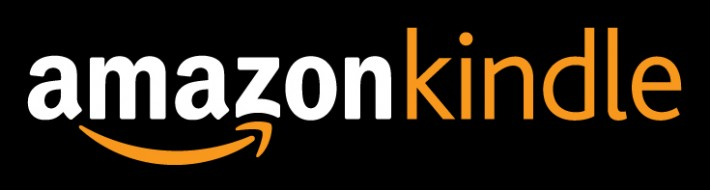

In [5]:
display.Image("amazon_logo.jpg")

# Sentiment Prediction of Amazon E-book Reviews Based on Clustering

# I. Executive Summary

Because of the rapid advancement of technology in recent years, internet shopping has become a popular way for people to buy and consume things. Companies may have mountains of consumer feedback accumulated in today's atmosphere of data overload. However, it is impossible for simple people to manually analyze it without error or bias.

Research on sentiment and opinion mining for online review analysis has attracted increasingly more attention because such study helps leverage information from online reviews for potential economic impact. Sentiment analysis of a huge number of e-commerce platform user evaluations may significantly increase consumer happiness. It is extremely important because it allows businesses to understand the sentiment of their customers towards their brand. By automatically sorting the sentiment behind social media conversations, reviews, and more, businesses can make better and more informed decisions.

In this lab, we will build models that classify whether a text has a negative, positive or neutral sentiments. We wanted to improve the machine learning classifier's performance by using k-means and agglomerative clustering to discover latent patterns in the Amazon E-book reviews dataset and use these clusters as new features in the data. After cleaning the text data, we divided our dataset into three based on customer's star ratings (e.g., 4-5 stars for positive, 3 stars for neutral, 1-2 stars for negative). Our benchmark model would classify the sentiments of the text review using the transformed vectorized matrix and `helpful votes` only. When we added the cluster labels resulted from the implementation of KMeans and Ward's agglomerative clusterings, the performance of our models did not improve. The latent information that can be found by clustering our data did not contribute on the performance of the classifier model. Using raw tfidf matrix derived from text reviews and helpful votes were sufficient features to obtain an average precision score of 62%.

# II. Motivation & Problem Statement

By automatically sorting the sentiment behind text reviews, businesses can make better and more informed decisions. This lab will attempt to answer four questions.

1. What are the common features of the highly rated e-books?
    - We are interested in finding out what makes certain books reach the top end of the charts and what kind of  books are given film adaptations based on certain factors.
   
   
2. What are the common sentiments of customers on their purchases?
    - We want to identify common emotions or "sentiments" from the given star-ratings.


3. What meaningful information/patterns can we retrieve from a large and sparse graph/cluster?
    - We want to discover latent pattern/information that is common for each cluster groups that is not obvious in the data. This can help business owners know which particular aspects or features on their products are mentioning in a positive, neutral, or negative way.


4. Does adding cluster labels improve machine learning classifier’s performance in predicting customer sentiments?
    - We want to improve machine learning model by adding latent pattern discovered through clustering. However, the cluster labels may not contribute to model performance.

    
    

# III. Methodology



The figure below shows the summary of our methodology. First, we collected the data and pre-processed it. Next, we vectorized our data using term frequency-inverse document frequency (TF-IDF). Afterwards, we performed sentiment analysis. We then reduced the dimension of our data using truncated SVD techniques, e.g., Latent semantic analysis. We then performed K-means and Agglomerative clustering on the truncated data. Lastly, we then proceeded to build our prediction model using text data and the cluster labels. 

						  Methodology Pipeline


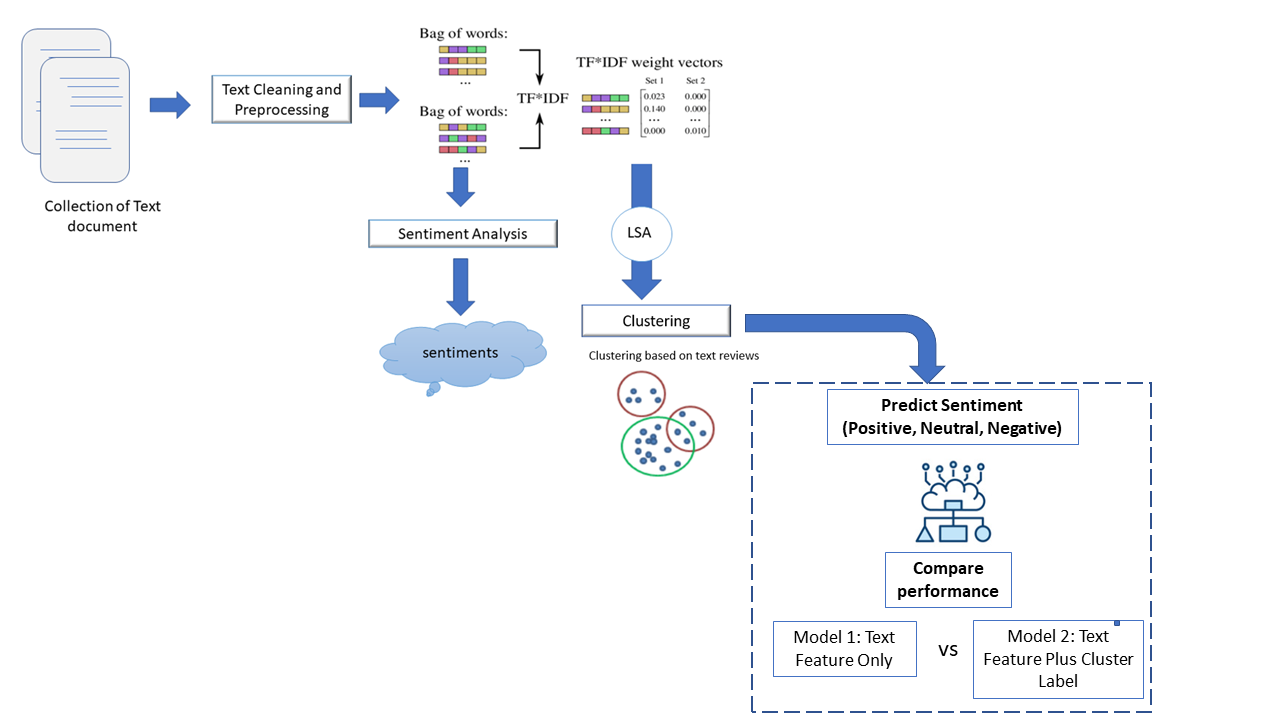

In [6]:
print('\t\t\t\t\t\t  Methodology Pipeline')
display.Image("pipeline2.PNG")

## III.I Text Cleaning and Preprocessing

Before the model can understand and interpret human language, a lot of pre-processing goes behind the scenes. The data to be analyzed are text reviews of customers of Amazon E-book. Text data are usually messy. To prepare the data for sentiment analysis and prediction modeling, data is cleaned using the pipeline below:

1. **Converting Accented Characters.**
Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. Words such as résumé, café, prótest, divorcé, coördinate, exposé, latté, are just few examples. However, in this project, all accented characters are converted to its usual form. We include this method to make sure characters which look identical actually are identical. We converted and standardized the text into ASCII characters. A simple example — converting é to e and résumé to resume.

2. **Removing punctuation, numbers and special characters.**
Special characters are non-alphanumeric characters. These characters are commonly found in reviews, social media posts, and comments. These characters add no value to text-understanding and induce noise into algorithms. We used regular-expressions (regex) to get rid of these characters and numbers.

3. **Removing stopwords.**
One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stopwords. A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that is usually ignored in the analysis. We used the nltk stopwords package to filter and remove the stopwords.

4. **Converting text to its base form or root form (Lemmatization).**
Through lemmatization, the texts are derived to their word stem, base or root form. For example, "eating" is converted to its base form "eat."

5. **Removing extra whitespaces and tabs.**
We also removed extra whitespaces and tabs do not add any information to text processing. 

6. **Converting to lowercase.**
We also converted the characters or text into lowercase. It can be achieved by using lower function.

## III.II. Basic Statistics

We then performed exploratory data analysis on the raw data set to be able to detect outliers, trivial features and gain insights regarding the distribution of the whole data set. We also checked the number of NaNs in the overall dataset. 

We checked the distributions of rating for all the e-books. We performed basic statiscics on the columns found in the dataset. We also checked what are the Top 10 e-books with high stars rating and made inferences.
 

## III.III Sentiment Analysis

We investigated on the sentiments conveyed by the customers on their E-book purchase. Positive words/sentences have a positive sentiment attached to them. For example, when some text indicates happiness, enthusiasm, or kindness, they're generally classified as having a positive sentiment. Similarly, negative sentences have a negative sentiment attached to them. For example, when some text indicates sadness, hate, violence, discrimination etc., they're generally classified as having a negative sentiment. When no emotions are implied, they're classified as neutral.

Since we were interested in the common sentiments of the customers on their e-book purchases, we performed sentiment analysis and used visualization like WordCloud from the wordcloud package.

In analyzing the sentiments of customers from text reviews we used star ratings given by customers. Reviews were divided into 3 sentiments: positive, negative and neutral. Typically, sentiments are quantified using polarity. All the reviews with star rating of 4-5 have a polarity score of 1. They are considered to have positive sentiments. All reviews with star rating of 3 have a polarity score 0 and considered to be neutral. On the otherhand, negative sentiments are reviews with star ratings 1-2 with polarity score -1.

The polarity scores are used as ground truths for prediction modeling. Samples with labels 1 are positive, 0 for neutral and -1 for negative sentiments.


## III.IV Dimensionality Reduction


**Latent Semantic Analysis (LSA).**
    LSA is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix. It is an application of Singular Value Decomposition (SVD) technique.

In the study, we converted the corpus to a sparse matrix of TF-IDF score (term frequency-inverse document frequency). Rows represent terms and columns represent documents. TF-IDF assigns a weight for term *j* in document *i* as follows:
    $$ w_{i,j} = tf_{i,j} \times \log(\frac{N}{df_i}) $$
    
 where:
 - $tf_{i,j}$ is the number of occurence of *i* in *j* 
 - $df_i$ is the number of documents containing *i*
 - $N$ the total documents

Since LSA is just an application of truncated SVD [[1](https://en.wikipedia.org/wiki/Latent_semantic_analysis)], we take`k` largest singular values (SV) (0<k<n, thus truncated) and their corresponding left and right singular vectors:
    $$ A_t ≈ U_{t} Σ V^{T}$$

Matrix $A_t$ with shape m x n is constructed via truncated SVD is an approximation to the original $A$. $U, Σ, V$ provide a real-valued matrix factorization of A. $U$ is a m × k matrix with orthonormal columns, $U^tU= I_k$, where $I_k$ is the k × k identity matrix. $V$ is an orthonormal k × n matrix. $Σ$ is a k × k diagonal matrix, with the non-negative singular values, s1, s2, . . . , sk, on the diagonal
    
    
## III.V Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them [[2]](https://www.geeksforgeeks.org/clustering-in-machine-learning/).

In this lab, we cluster text review `review_headline` and `helpful_votes.`


In the study, we used 2 types of clustering approaches: K-means and Ward's hierarchical clustering.

1. K-means.

K-Means is one of the most popular clustering algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters. [[3]](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

2. Ward's hierarchical clustering.

This is an alternative approach for performing cluster analysis. Basically, it looks at cluster analysis as an analysis of variance problem, instead of using distance metrics or measures of association. This method involves an agglomerative clustering algorithm. It will start out at the leaves and work its way to the trunk, so to speak. It looks for groups of leaves that form into branches, the branches into limbs and eventually into the trunk. Ward's method starts out with n clusters of size 1 and continues until all the observations are included into one cluster. [[4]](https://online.stat.psu.edu/stat505/lesson/14/14.7)

**Validation Metrics (taken from Clustering exercise of Prof. Alis)**

The term cluster validation is used to design the procedure of evaluating the goodness of clustering algorithm results. This is important to avoid finding patterns in a random data, as well as, in the situation where we want to compare two clustering algorithms. There are 2 types of validation metrics for clustering: internal and external validation metrics.

1. **Internal validation**

    Internal validation means we are not relying on ground truth values to evaluate the quality of the clustering.  Each criterion will favor a clustering method that optimizes a function which is similar to the criterion itself. Thus, comparing totally different clustering methods using a criterion may end up being misleading.

    The internal validation criteria that we will use are:

    * **Sum of squares distances to centroids**: In the case of $k$-means and other representative-based methods, this is $Q$ and corresponds to the sum of squares distances to the representative points. This is given by the `inertia_` property of `KMeans`. Smaller values suggest better clustering. This is optimized for distance-based algorithms.

    * **Calinski-Harabasz index**: Also known as the Variance Ratio Criterion, it is the ratio of the between-clusters dispersion mean and the within-cluster dispersion,
        $$s_k = \frac{B_k/(k-1)}{W_k/(n-k)}$$
        where $B_k$ is the between group dispersion matrix and $W_k$ is the within-cluster dispersion matrix defined by
        $$
        \begin{align}
        B_k &= \sum_{i=1}^k n_i \lvert\lvert \bar x_i - \bar x \rvert\rvert_2^2;\\
        W_k &= \sum_{i=1}^k \sum_{x \in C_i} \lvert\lvert x - \bar x_i \rvert\rvert_2^2,
        \end{align}
        $$
        with $n$ the number of points in our data, $C_i$ the set of points in cluster $i$, $\bar x_i$ the center of cluster $i$, $\bar x$ be the center of all points, $n_i$ be the number of points in cluster $i$ and $n$ be the number of points. The higher the value of this measure, the more defined the clusters are.

    * **Silhouette coefficient**: Let $Davg^{in}_i$ be the average distance of $x_i$ to data points within the cluster of $x_i$, and $Dmin^{out}_i$ be the smallest average distance to points other than its own cluster. The silhouette coefficient $S_i$ for the $i$th data point specific to the ith object, is as follows: 
        $$
        S_i = \frac{Dmin^{out}_i − Davg^{in}_i}{\max\{{Dmin^{out}_i}, Davg^{in}_i\}}
        $$
        The overall silhouette coefficient is the average of $S_i$. Its value is in the the range (−1,1). Large positive values indicate highly separated clustering, and negative values are indicative of some level of “mixing” of data points from different clusters. This is because $Dmin^{out}_i$ will be less than $Davg^{in}_i$ only in cases where data point $x_i$ is closer to at least one other cluster than its own cluster. One advantage of this coefficient is that the absolute values provide a good intuitive feel of the quality of the clustering.


2. **External validation**

    External validation requires ground truth labels and in real life, these are hard to come by. However, since we assumed a ground truth label based on the cultivator and newsgroup, we can use these criteria.

    The external validation measures that we will compute are:
    * **Cluster purity**: Measures how dominant the dominant class of each ground truth class is. The higher the value the better. Let $m_{ij}$ be the number of data points from ground-truth cluster $i$ that are mapped to cluster $j$, $N_i$ is the number of data points in the ground-truth class $i$, $M_j$ the number of data points in cluster $j$, $k_t$ is the number of ground truth clusters and $k_d$ is the number of clusters determined by the algorithm. We can then write the number of data points in different clusters as
    $$
    N_i = \sum_{j=1}^{k_d} m_{ij}; \\
    M_j = \sum_{i=1}^{k_t} m_{ij}.
    $$
    The number of data points $P_j$ in the dominant class of cluster $j$ is given by
    $$
    P_j = \max_i m_{ij}.
    $$
    We define Purity as
    $$
    \text{Purity} = \frac{\sum_{j=1}^{k_d} P_j}{\sum_{j=1}^{k_d} M_j}.
    $$
    High values of Purity are desirable.
    * **Adjusted mutual information**: A problem of Purity is that it only considers the dominant class. Adjusted mutual information considers the distribution of all classes. Unlike other mutual information measures, it is also adjusted for chance. For two class labelings $U$ and $V$, the adjusted mutual information is
    $$
    \text{AMI} = \frac{\text{MI} - E[\text{MI}]}{\max(H[U], H[V]) - E[\text{MI}]}.
    $$
    The expectation $E[\text{MI}]$ is quite long and can be found [[5]](https://en.wikipedia.org/wiki/Adjusted_mutual_information#Adjustment_for_chance). Values of AMI is in $[0,1]$ with values close to zero implying the two labelings are independent and a value of 1 indicating that the two label assignments are equal (with or without permutation).
    * **Adjusted Rand Index**: The adjusted Rand index is another measure that considers all classes, not just the dominant class. The Rand Index is the sum of the fractions of pairs of elements that are in the same class and should be in the same class, and pairs of elements that are in different classes and should be in different classes. If $C$ is the ground-truth class assignment and $K$ is the clustering, we define $a$ and $b$ as:
      * $a$: the number of pairs of elements that are in the same set in $C$ and in the same set in $K$
      * $b$: the number of pairs of elements that are in different sets in $C$ and in different sets in $K$
    The Rand index is then given by
    $$
    \text{RI} = \frac{a + b}{C_2^{n_{samples}}}
    $$
    where $C_2^{n_{samples}}$ is the total number of possible pairs in the dataset (without ordering). To adjust for chance, the adjusted Rand index is
    $$
    \text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.
    $$   



## III.VI. Predicting Sentiments using SVM


We will use support vector machine (SVM) to predict the sentiment of the data sample. We used SVM due to the fact that it is effective in handling high dimensional spaces. The type of problem we are solving is a multi-classification problem. We made 3 models. Model 1 is our benchmark model. It was trained only using the original tfidf matrix of the text review and `helpful_votes` which corresponds to number of users who flagged the review as helpful. Model 2 was trained using the tfidf matrix of the text data, `helpful_votes`, plus the cluster labels using K-means while model 3 was trained using the tfidf matrix of the text data, `helpful_votes`, plus the cluster labels using Ward's agglomerative cluster labels.

To compare model performance, we plotted the precision-recall curve and get the average precision-recall scores as our metric for each class label (e.g.,-1 for negative, 0 for neutral, 1 for positive). For simplicity, we only used the default hyperparamater for our SVM classifier. We used the sklearn package for SVM and our metric scores.


# IV. Data Source 

## IV.I Data Retrieval

**Data set**. Data used in the study is E-book reviews collected from amazon.com. The data can be retrieved using the jupyter terminal (mnt/data/public/amazon-reviews/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz)
The first three rows of the dataset is shown below.

In [7]:
df.head(3)

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     33605939   RGYFDX8QXKEIR  B007KO2MLO       328837464   
1          US     34058393  R13CBGTMNV9R8Z  B005FLODDE       764276359   
2          US     39601147   R7DRFHC0F71O0  B00EA3L35O       535606445   

                                       product_title        product_category  \
0                                          Big Maria  Digital_Ebook_Purchase   
1  The Woman Who Wasn't There: The True Story of ...  Digital_Ebook_Purchase   
2                            Mary had A Sleepy Sheep  Digital_Ebook_Purchase   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4            0.0          0.0    N                 N   
1            4            1.0          2.0    N                 Y   
2            5            0.0          0.0    N                 N   

              review_headline  \
0                      Quirky   
1  The Woman Who Wasn't There   
2    This Sleepy Sheep rocks!   

                                         review_body review_date  
0  Elmore Leonard meets the cast of Sierra Madre....  2013-09-09  
1  This book was very interesting. It is a true s...  2013-09-09  
2  I had the opportunity to review Mary had a Sle...  2013-09-09

**Data Dictionary**

The dataset contains 15 columns with the following descriptions:

| Features          | Description                                                              |
|-------------------|--------------------------------------------------------------------------|
| marketplace       | Market geographical location.                                            |
| customer_id       | Unique customer identification number.                                   |
| review_id         | Unique review identification number.                                     |
| product_id        | Unique product identification number.                                    |
| product_parent    | Parent listing used to establish relationships between child products.   |
| product_title     | Unique name of the product.                                              |
| product_category  | class to which the product belongs.                                      |
| star_rating       | rating from 1 to 5 where 1 is lowest and 5 is highest.                   |
| helpful_votes     | Number of users who flagged the review as helpful.                       |
| total_votes       | total number of helpful votes.                                           |
| vine              | Whether a reviewer is a Amazon Vine member. (No or Yes)                  |
| verified_purchase | Whether a purchase was bought at normal price (or close to). (No or Yes) |
| review_headline   | Snapshot of the main review.                                             |
| review_body       | Detailed mass of the main review.                                        |
| review_date       | When the review was written.                                             |


## IV.II Data Cleaning

**Drop null**. The dataset contains more or less 5 million rows therefore we decided to drop 216 rows containing null data points.

**Limit to year 2013**. We chose to focus on reviews made in year 2013 since these were the years with the most amount of E-book purchases. Previous years were almost completely blank.

**Dropping trivial columns**. We dropped columns that didn't contain any usable data. Only three columns were used in the section VI.I, namely `product_title`,`review_headline`, and `star_rating`.

**Random Undersampling of dataset**. In the analysis, we reduced the dataset to be analyzed to 5,000 samples. This is due to limitation of computing power. We decided to undersample and balance the data. The overall dataset is composed of reviews with 1,000 sample size for each star-rating.

# V. Data Exploration

## V.I Data types per feature

In [8]:
print('\nData Types per feature')
print()
df.info()


Data Types per feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100209 entries, 0 to 5100424
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   marketplace        object        
 1   customer_id        int64         
 2   review_id          object        
 3   product_id         object        
 4   product_parent     int64         
 5   product_title      object        
 6   product_category   object        
 7   star_rating        int64         
 8   helpful_votes      float64       
 9   total_votes        float64       
 10  vine               object        
 11  verified_purchase  object        
 12  review_headline    object        
 13  review_body        object        
 14  review_date        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 622.6+ MB


**Numerical Columns of interest**:

- star_rating
- helpful_votes
- total_votes

## V.II Descriptive Statistics for numerical columns

In [9]:
print('\nBasic statistics of the Relevant Amazon E-book reviews features')
df[['star_rating','helpful_votes','total_votes']].describe()


Basic statistics of the Relevant Amazon E-book reviews features


star_rating  helpful_votes   total_votes
count  5.100209e+06   5.100209e+06  5.100209e+06
mean   4.240892e+00   1.613032e+00  2.275919e+00
std    1.120672e+00   1.338733e+01  1.520255e+01
min    1.000000e+00   0.000000e+00  0.000000e+00
25%    4.000000e+00   0.000000e+00  0.000000e+00
50%    5.000000e+00   0.000000e+00  1.000000e+00
75%    5.000000e+00   1.000000e+00  2.000000e+00
max    5.000000e+00   1.842900e+04  1.936800e+04

All null data points and other trivial features containing one value are dropped. We find the amount of null values (0.004%) is immaterial relative to the total number of data points in the data set.

## V.III Distribution per numerical feature

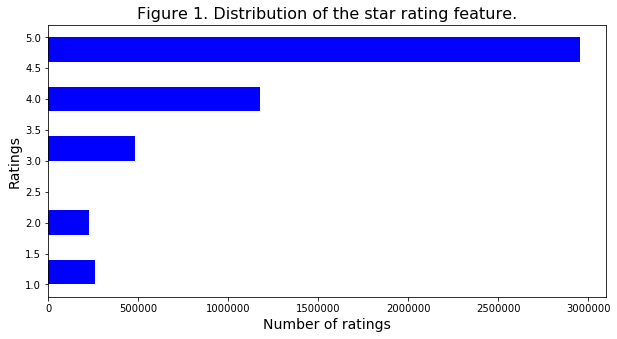

In [10]:
utils.stardist_plotter(df, f_num=1)

The data contains more 5 rated purchases which may be a sign that customers are either very forgiving or that the books in the Amazon kindle store are just higher quality books in general.

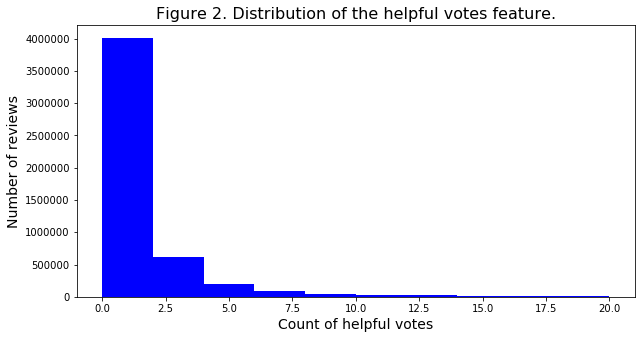

In [11]:
utils.helpful_votes_distplotter(df, f_num=2)

There are a lot of reviews that aren't really labeled as helpful which is understandable since some reviews might become burried as newer reviews come in. 

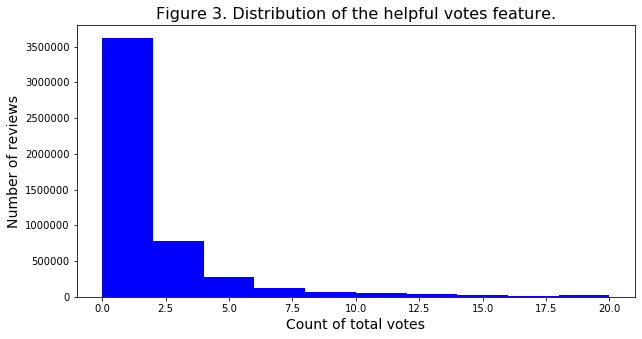

In [12]:
utils.total_votes_distplotter(df, f_num=3)

The total votes feature is just an aggregated version of the helpful votes feature and therefore exhibits an almost identical distribution behavior.

## V.IV Pearson Pairwise Correlational heatmap

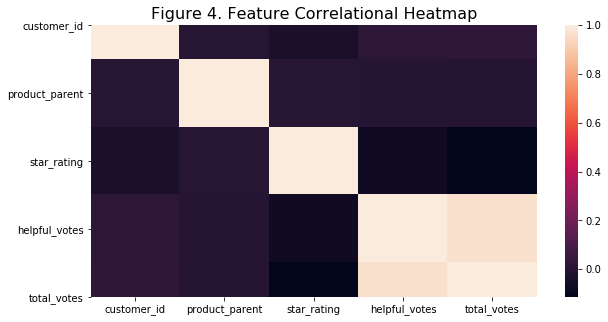

In [13]:
utils.pearson_heatmap(df, f_num=4)

Interestingly, there seems to be strong positive linear correlation helpful votes and total votes.

## V.V Distribution of Reviews per unit Time

<Figure size 720x360 with 0 Axes>

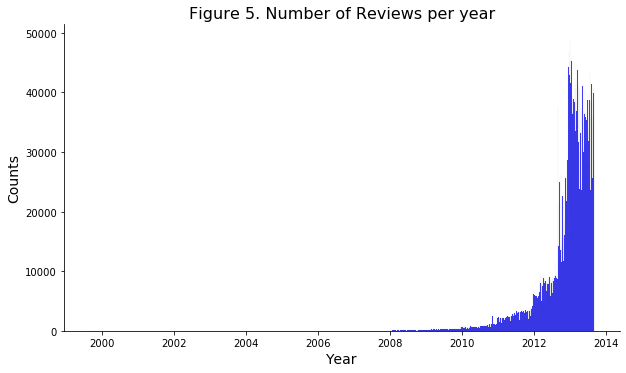

In [14]:
utils.plot_year_reviews(df, f_num=5)

We intend to explore the distribution of review counts per year from the early 2000's upto 2014 to be able to discover where the data points are being concentrated at. Through this the research can be narrowed to a few years which contain the most number of review data points and from which insights can also be generated as to why this behavior has occured.

The dataset were from August 1999 - September 2013. From the figure above, it can be observed that number of customers purchasing E-books on Amazon was increasing abruptly starting in the year 2010. The number of reviews also started to increase in 2010. Moreover, the highest number of the reviews were in year 2013 and the highest number of reviews were on the month of January.

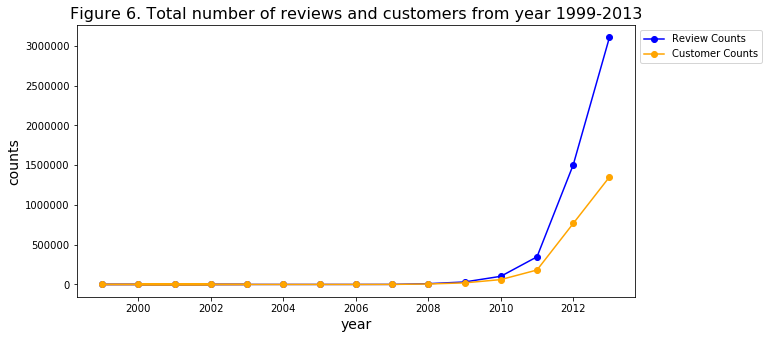

In [15]:
utils.year_customer_reviews(df, f_num=6)

We found out that some customers have purchased multiple times and most probably also posted reviews multiple times. Therefore, there are more reviews than there are customers.

## V.V Data Summary

All in all, this set of data was processed, cleaned and explored to collect some useful insights to provide conclusion in accordance to our stated problems

- Null data point count: 216

- Total Number of Rows after processing: 5,100,209

- Most purchases came from the year 2013.

- There is a strong positive linear correlation helpful votes and total votes.

- Customers have purchased multiple times and most probably also posted reviews multiple times.


# VI. Results & Discussion

## VI.I What are the common features of the highly rated e-books?


### VI.I.a Review count in 2010-2013


In [16]:
df_limit = df[df['year'] >= 2010]

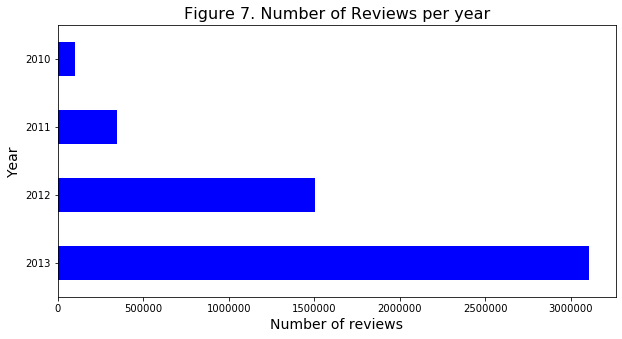

In [17]:
utils.bar_plot_year(df_limit, f_num=7)

2013 sales of ebooks has boosted significantly, this is probably due to the rampant releases of affordable and more powerful smartphones in the market around the globe. It was also in this year when the world's first 64 bit smartphone got released so the power of smartphone technology is starting to gain ground.[[6]](https://www.anandtech.com/show/7304/apple-announces-a7-worlds-first-64bit-smartphone-soc)

### VI.I.b Diving in 2010-2013

In this section we intend to limit the EDA further to the years 2010-2013, This is due to the fact that the purchase of ebooks from Amazon only started to gain significant traction during 2010. A good reason for this is 2010 is the rise of the handheld smartphones that everyone is using nowadays, lower cost and relatively powerful to run apps like ebook readers.[[7]](https://newatlas.com/mobile-technology/smartphone-history-review-2010-2019/)

Below are the rankings of books based on review count which can be inferred also as purchase count since a customer cannot give a review if the customer did not first perform a purchase of the title. All books below are top-rated based on star ratings (all are 5-rated).

#### 2010

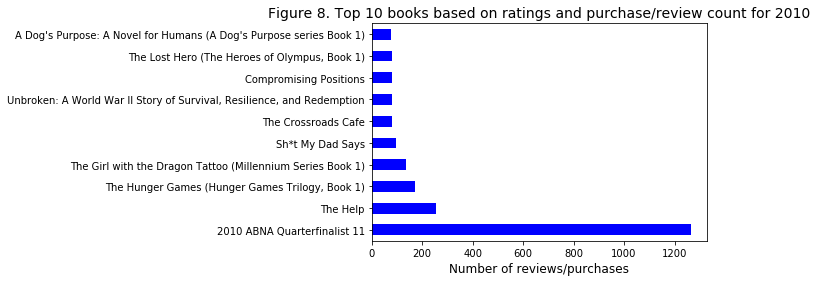

In [18]:
utils.grouper(df_limit, 2010, f_num=8)

The 2010 ABNA Quarterfinalist 11 are a set of books that have reached the highest round of the 2010 Amazon Breakthrough Novel Awards.[[8]](https://en.wikipedia.org/wiki/Amazon_Breakthrough_Novel_Award) This is not just a single book and that explains the bulk of purchases all being aggregated into a single bin. 

It makes more sense to analyze the next bins since these are single purchases of a book and we may be able to get more insights through choosing to analyze individual books that we can trace the titles of and their individual purchase count.

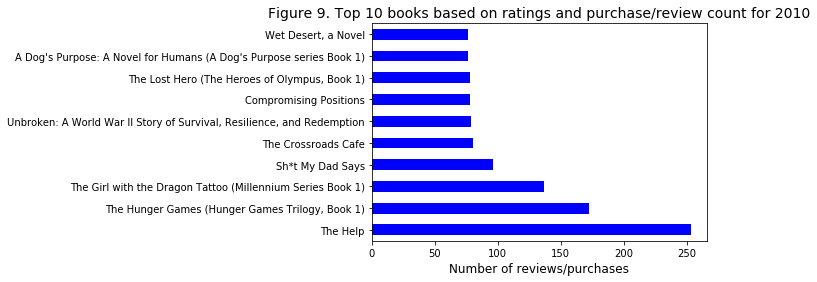

In [19]:
utils.grouper(df_limit, 2010, 9, True)

We can see here that the top 1 book by highest purchase count and by rating of 5 stars is a book called 'The Help'. The Help is a historical fiction novel by American author Kathryn Stockett and published by Penguin Books in 2009.[[9]](https://www.google.com/search?q=the+help+book&oq=the+help+book&aqs=chrome..69i57j46i512j0i512l8.5173j0j9&sourceid=chrome&ie=UTF-8) Due to popularity the 'The help' also received it's film adaptation in 2011.

'The help' is followed by the book 'The Hunger Games Book 1'. The Hunger Games is a 2008 dystopian novel by the American writer Suzanne Collins.[[10]](https://www.google.com/search?q=the+hunger+games+book+1&oq=the+hunger+games+book+1&aqs=chrome..69i57j46i512j0i512j0i20i263i512j0i512l6.4745j0j9&sourceid=chrome&ie=UTF-8). Due to popularity the book received it's film adaptation in 2012.

The third in this list is a book called 'The Girl with the Dragon Tattoo Book 1'. The Girl with the Dragon Tattoo is a psychological thriller novel by Swedish author and journalist Stieg Larsson, which was published posthumously in 2005 to become an international bestseller.[[11]](https://www.google.com/search?q=the+girl+with+the+dragon+tattoo+book+1&oq=the+girl+with+the+dragon+tattoo+book+1&aqs=chrome..69i57j0i22i30.12530j0j9&sourceid=chrome&ie=UTF-8) Due to popularity the book received it's film adaptation in 2011.

#### 2011

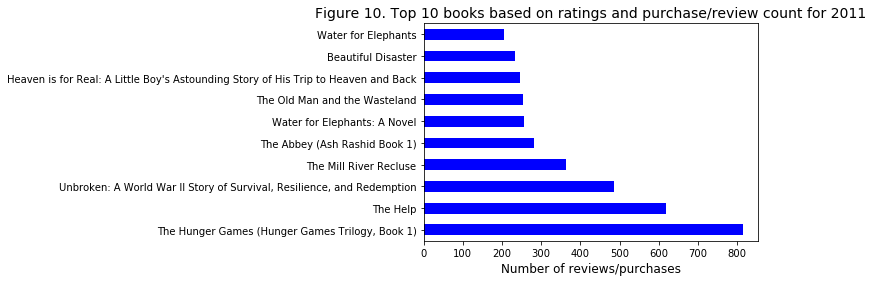

In [20]:
utils.grouper(df_limit, 2011, f_num=10)

'The Hunger Games Book 1' and 'The help' still occupies the first 2 spots, although, this time 'The Hunger Games' takes the number one spot. 

The third spot is now taken over by a book called 'Unbroken: A World War II Story of Survival, Resilience, and Redemption'. Unbroken: A World War II Story of Survival, Resilience, and Redemption is a 2010 non-fiction book by Laura Hillenbrand. [[12]](https://en.wikipedia.org/wiki/Unbroken:_A_World_War_II_Story_of_Survival,_Resilience,_and_Redemption). The book received a Film Adaptation in 2014 called 'Unbroken'.

#### 2012

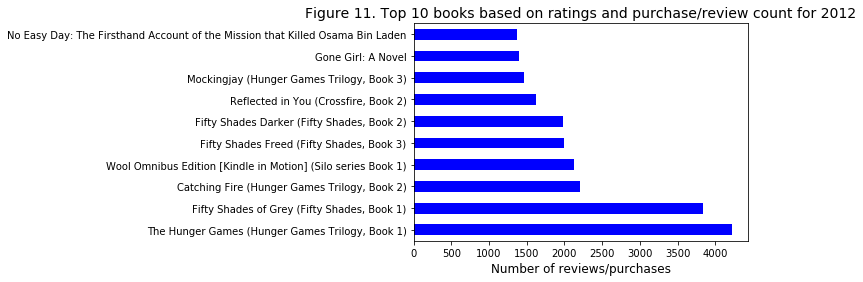

In [21]:
utils.grouper(df_limit, 2012, f_num=11)

'The Hunger Games Book 1' still holds the number one spot in amazon for 2012 based on purchase volume and ratings. This is probably also caused by the movie being released in 2012 and the marketing campaigns launched to promote the film. This causes a positive effect in the sales of the book as it gets tied with the film release.

The second spot is now taken by the book called 'Fifty Shades of Grey Book 1'. Fifty Shades of Grey is a 2011 erotic romance novel by British author E. L. James. It became the first instalment in the Fifty Shades novel series. [[13]](https://en.wikipedia.org/wiki/Fifty_Shades_of_Grey). The book received it's film adaptation 2015.

The third spot is taken by the book 'Catching Fire' which is the second book in the the Hunger Games franchise by the same Author. The book received it's film adaptation in 2013.

#### 2013

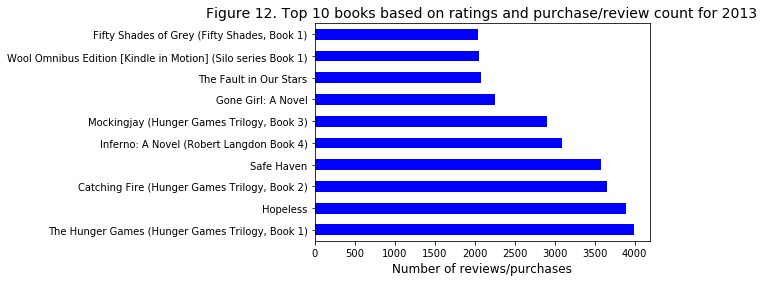

In [22]:
utils.grouper(df_limit, 2013, f_num=12)

'The Hunger Games Book 1' still holds the number one spot in amazon for 2013 based on purchase volume and ratings.

The second spot is now taken by a book called 'Hopeless'. Hopeless is a 2012 novel by Colleen Hoover. The book went against the pattern of having a film adaptation immediately after a couple of years. The reason as to why it did not receive a film adaptation is not very clear.

The third spot is still occupied by the book Catching Fire although it did not take the first place even when it's movie was released on this year. It could be that a lot of casual readers are still entering the franchise and deem it natural to start with the first book rather than jump ahead in on the second book.

### VI.I.c Section summary

It can be inferred that 2010-2013 is consistently dominated by books from Suzanne Collins. 2012 was dominated by the 50 shades of grey franchise written by E.L. James. We have also discovered that books that hit the top 10 have a very high chance of having a film adaptation, while, Books in the top 1-3 spots are almost always guaranteed a film adaptation with the exception of Hopeless in which based on research was a potential film but was never released as one due to unknown reasons. It can be further stated that books that reached the top 10 based on rating and sales/review counts are mostly fictional books when each title is researched. 


	Books from Suzanne Collins and E.L. James are the most popular in based on appearance on the list



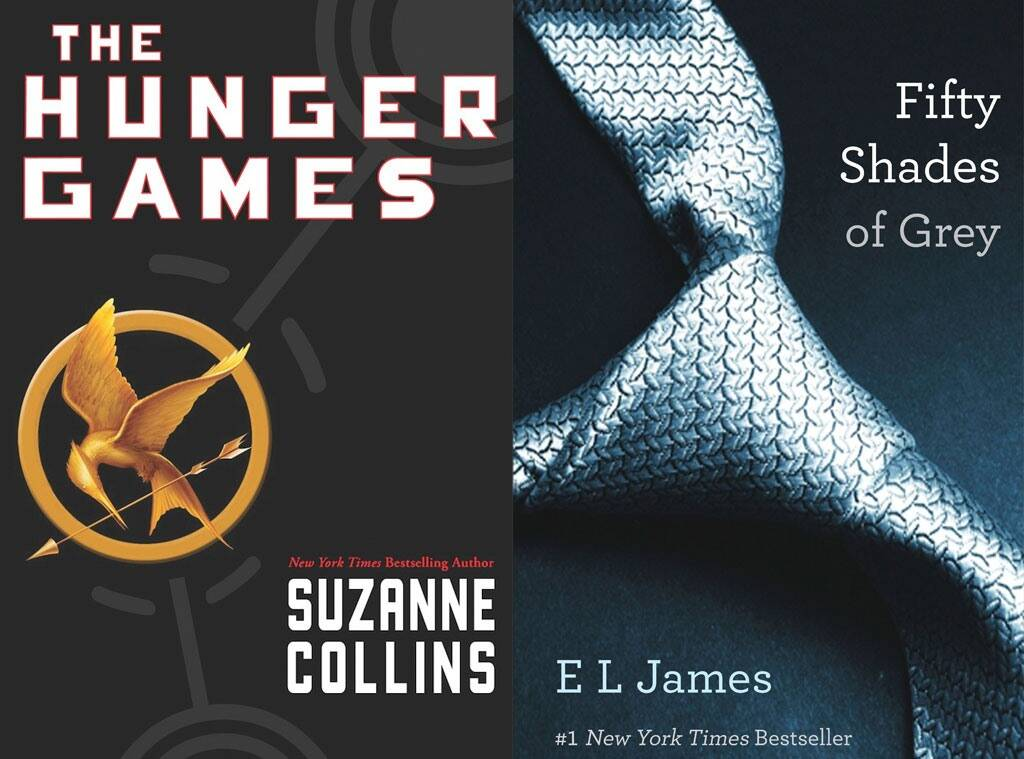

In [23]:
print('\n\tBooks from Suzanne Collins and E.L. James are the most popular in based on appearance on the list')
print()
display.Image("1024.bookcovers.mh.071912.jpg") 

## VI.II What are the common sentiments of customers on their purchases?

In this lab, we only included reviews recorded in the year 2013. Since our data is huge and we have limited computing power, we reduced our data to 5000 samples. However, we made sure that we have 1000 samples each for 5-star, 4-star, 3-star, 2-star and 1-star reviews.

In [24]:
df1 = utils.get_sentiment_df(df, start_date='2013-01-01',
                  n=1000, target_col='review_headline')
del df

The sample truncated dataset is shown below.

In [25]:
df1.head(2)

product_title  \
0                             Eye Makeup Made Simple   
1  Adam, Enough Said (This Can't Be Happening Boo...   

              review_headline  \
0  needs better illustrations   
1            bitches be crazy   

                                         review_body  helpful_votes  \
0  I expected step by step photos and more exampl...            0.0   
1  I didn't bother to count how many times Adam u...            4.0   

  cleaned_review_headline  star_rating  score_group  
0  need well illustration            1           -1  
1             bitch crazy            1           -1

### VI.II.a Sentiments Analysis on Reviews Based on Star Rating

We focused on the review headlines since most of the customers summarize their thoughts in the headline. The second reason is the running time. Review headlines are usually short compared to review body. This will save much of computation power and time.

After removing special characters and stopwords, the texts were converted to its root or base form. Finally, reviews were divided into 3 sentiments: positive, negative and neutral. Positive sentiments are reviews that got 4 and 5 star ratings. Neutral sentiments are reviews with 3 stars. On the otherhand, negative sentiments are reviews with star ratings 1-2.

Figure 13 shows the distribution of the positive, negative and neutral sentiments in our data.

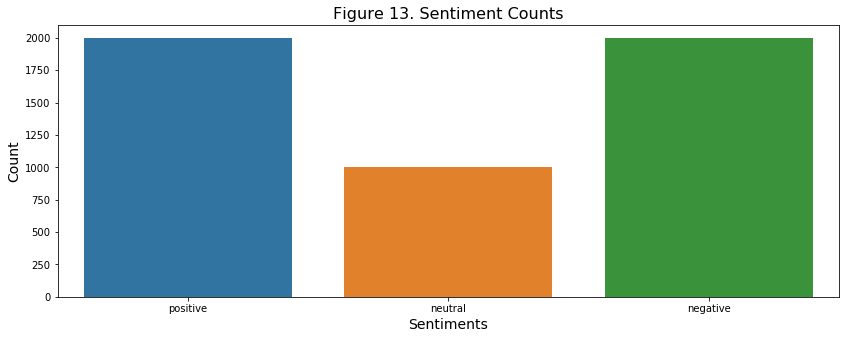

In [26]:
utils.plot_sentiments_count(df1, f_num=13)

In the dataset, positive and negative sentiments are twice as many as the neutral sentiment. Frequent words used by customers for each of the three sentiments will be discussed in the next section.

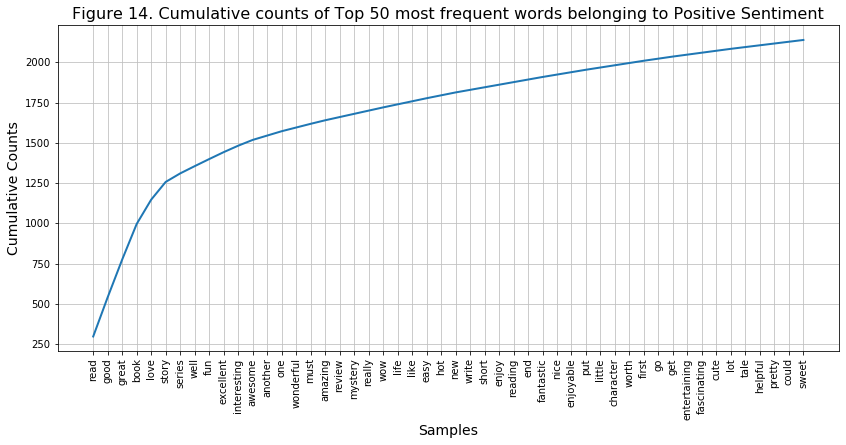

In [27]:
utils.plot_freq_words(df1, 'Positive', f_num=14)

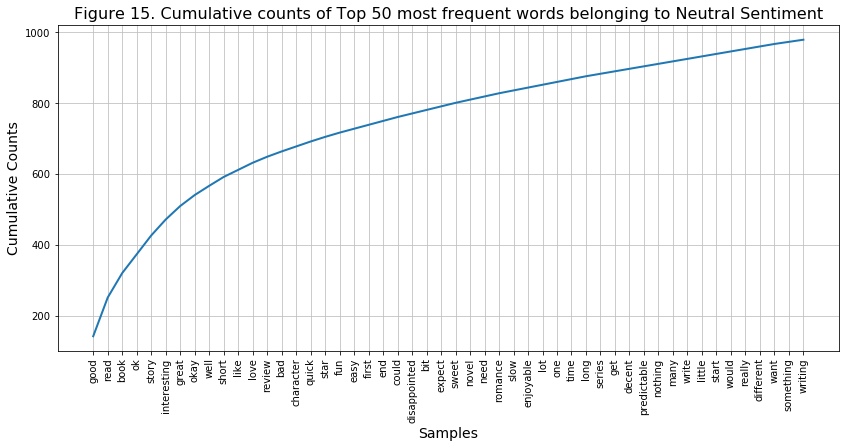

In [28]:
utils.plot_freq_words(df1, 'Neutral', f_num=15)

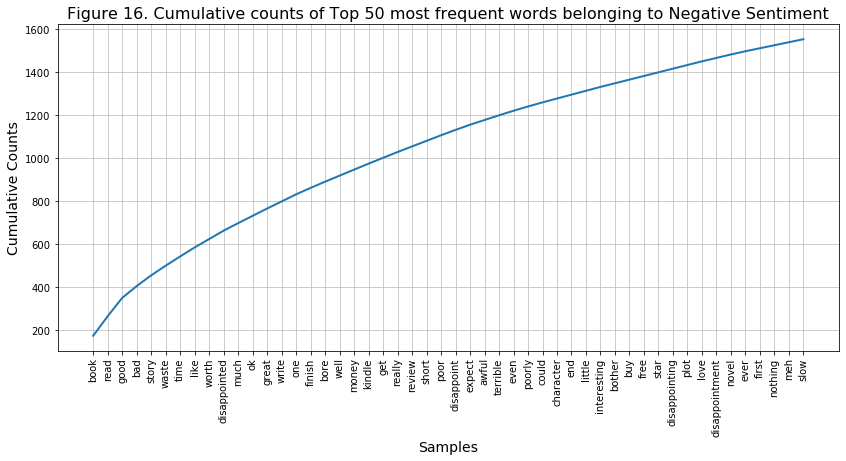

In [29]:
utils.plot_freq_words(df1, 'Negative', f_num=16)

Figures 14-16 shows the top 50 most common words and the cumulative counts of the terms in the document.
Figure 14 shows the cumulative counts for the top 50 most frequent words which is on the document with positive sentiments. Frequent words include read, good, great, wonderful, excellent, etc.
Moreover, Figure 15 and 16 show the cumulative counts of the Top 50 frequent words which is on the document with neutral and negative sentiments, respectively. Words regarded as neutral are good, okay, interesting, like, read, etc. However, words regarded as negative include read, good, waste, bad, like, bore, etc.


It is easier to show the frequent words for each sentiment using wordcloud. Wordcloud as the name suggests is a cloud of words.  It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Figures 17-19 show the wordcloud for positive, neutral and negative sentiments, respectively.

**Positive Review Cloud**

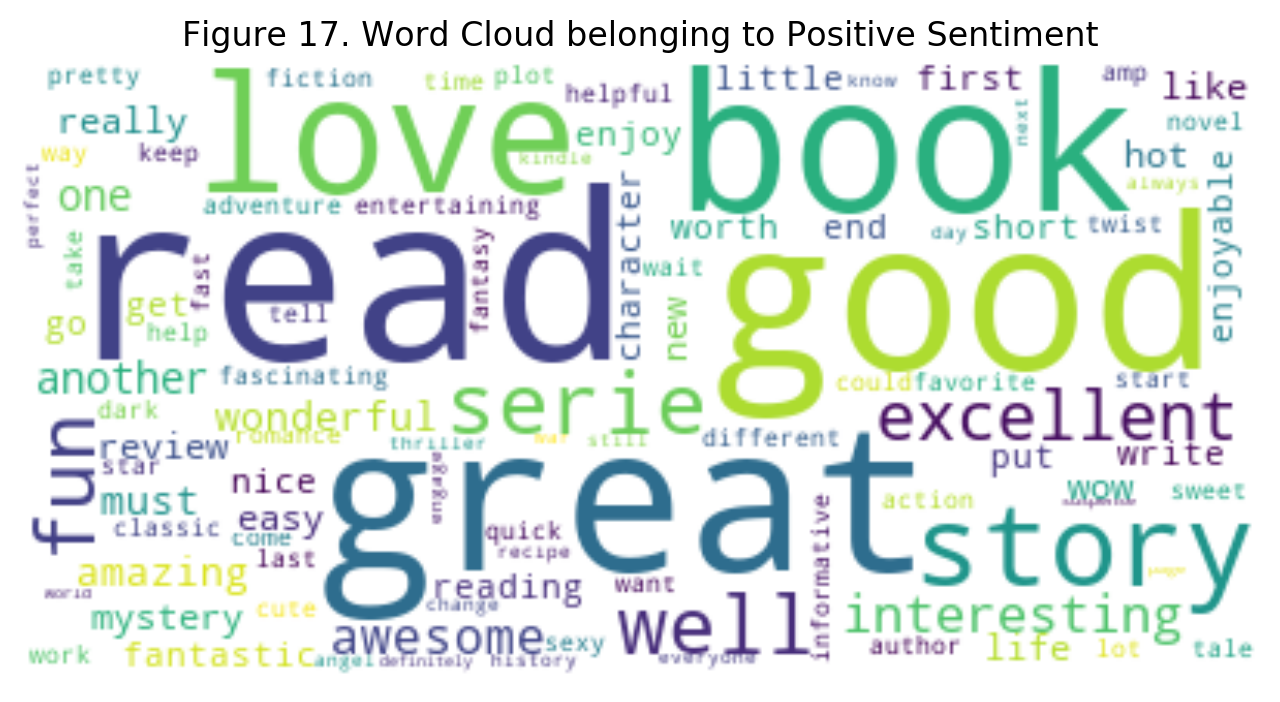

In [30]:
utils.word_cloud(df1, 'Positive', f_num=17)

**Neutral Review Cloud**

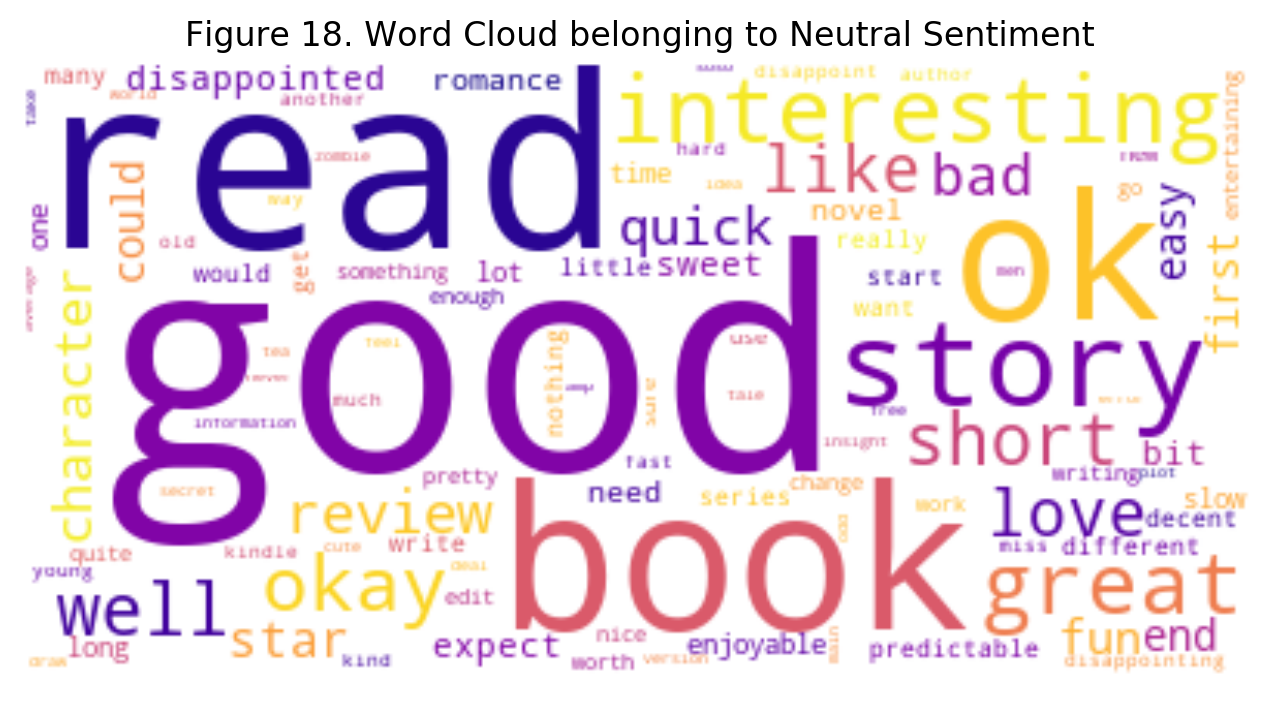

In [31]:
utils.word_cloud(df1, 'Neutral', f_num=18)

**Negative Review Cloud**

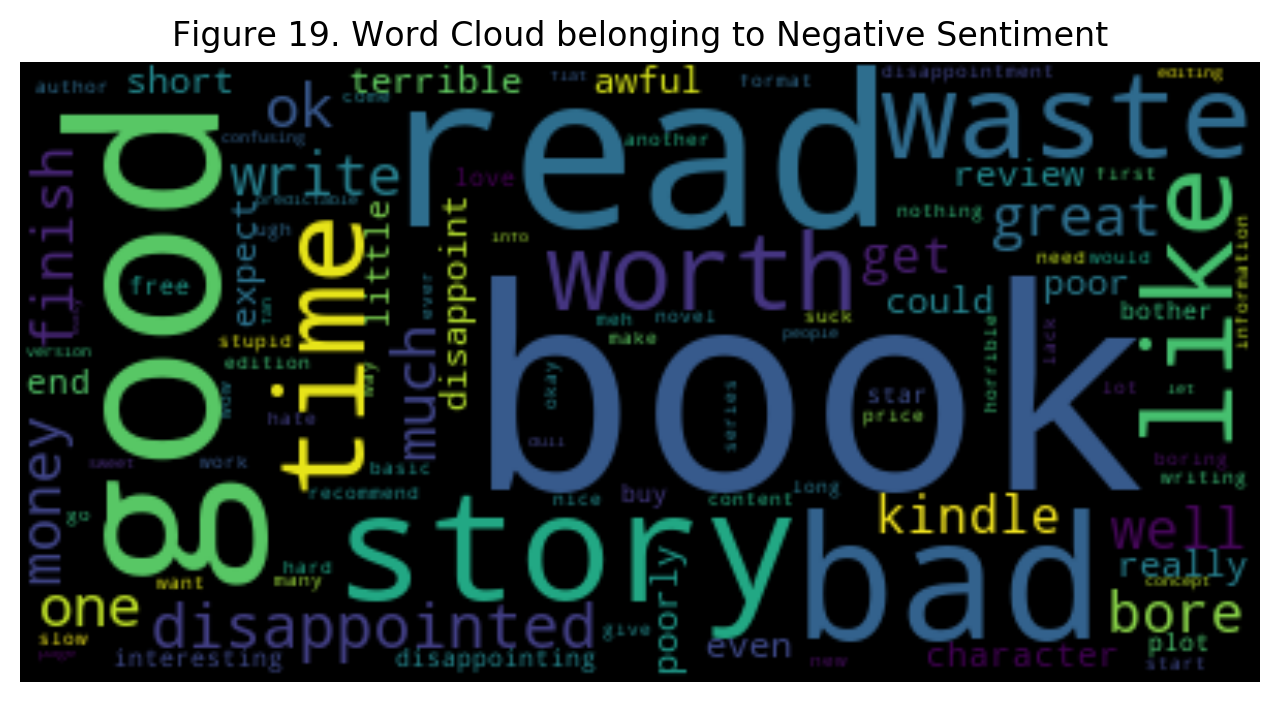

In [32]:
utils.word_cloud(df1, 'Negative', f_num=19)

Using the star ratings of the reviews to divide the documents into 3 e.g.(positive (4-5 stars), negative (1-2 stars), and neutral (3 stars) show that:
1. Customers loved e-books with excellent, great, or good stories. *Awesome, fun, new, twist, funny, romance, mystery, exciting* are also frequently used. Customers like e-books with funny, mysterious and romantic plot or content.
2. Customers who had neutral sentiments on their purchase usually described their e-books with *good, predictable, short* and *interesting*. Well written series, novels or stories may interest customers but also predictable plot may bore them, which may conclude why they had neutral sentiments on the e-book. Interestingly, there were also customers who mentioned *bad* on their purchase. 

3. Customers who gave 1-2 stars on the reviews also find their purchases as waste of money. E-books with *boring, slow and poorly written* content or plot are dissapointing to readers. Words *terrible, horrible, awful* and *bad* are also captured in the negative wordcloud. However, the word *good* may be misleading as shown in Figure 19. Since the stop words like *not* and *no* are removed in the cleaning process, the phrase *not good* may be captured as *good*.

## VI.III What meaningful information/patterns can we retrieve from a large and sparse graph/cluster?

In this section, we will applied clustering techniques to group similar reviews. We explored 2 clustering methods: K-means and Ward's Agglomerative clusterings. However, before performing clustering, we reduced our text data using Latent semantic analysis (LSA).

### VI.III.a Dimensionality Reduction using LSA

The tf-idf scores are shown below for each term (column) in the overall documents (row).

In [33]:
tfidf, df2, feature_names = utils.get_matrix_tfidf(df1)

45


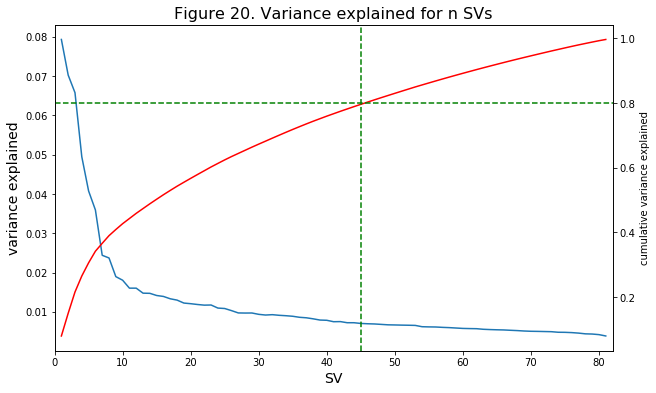

In [34]:
k, lsa, doc_topic= utils.plot_variance_per_n(tfidf= tfidf, n_components=81,
                        threshold_variance=0.80, plot=True, f_num=20)
print(k)

The reason SVD is useful, is that it finds a reduced dimensional representation of the matrix that emphasizes on the strong relationships and removes the noise. In other words, it makes the best possible reconstruction of the matrix with the least possible information. The trick in using SVD is in figuring out how many dimensions(concepts) to use when approximating the matrix.

Figure 20 shows the variance explained per number of singular values (SVs) used in the model. To retain 80% of the information from the data, we would need to retain 45 singular vectors as shown in the green perpendicular lines. We decided to keep only 45 dimensions in the analysis.

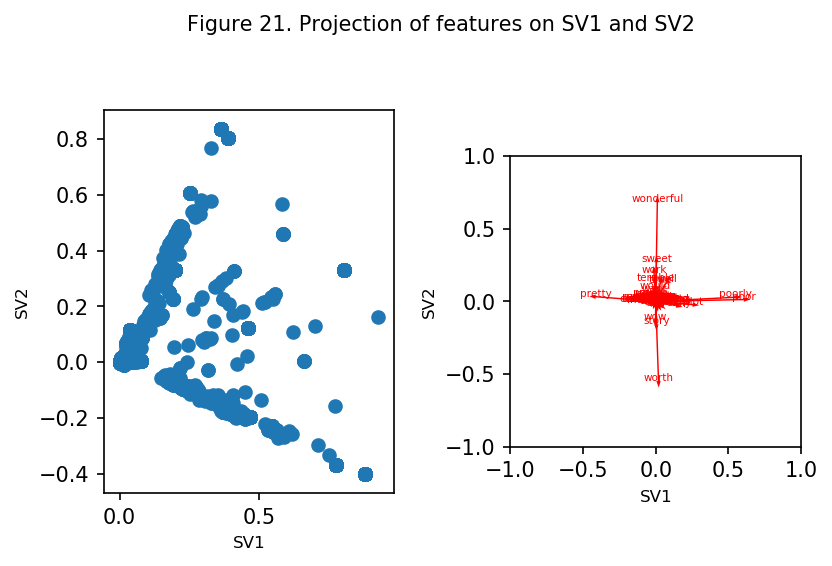

In [35]:
Vt = utils.plot_SV_vs_features(doc_topic, tfidf, lsa, feature_names, f_num=21)

Figure 21 shows the projected features on the SV1 and SV2. There's a lot of features and it's difficult to read the labels and arrows. We decided to look on the weights for the top 10 features with highest weight for the top 6 singular vectors. This is shown in Figure 22.

**Feature Correlation with SVs**

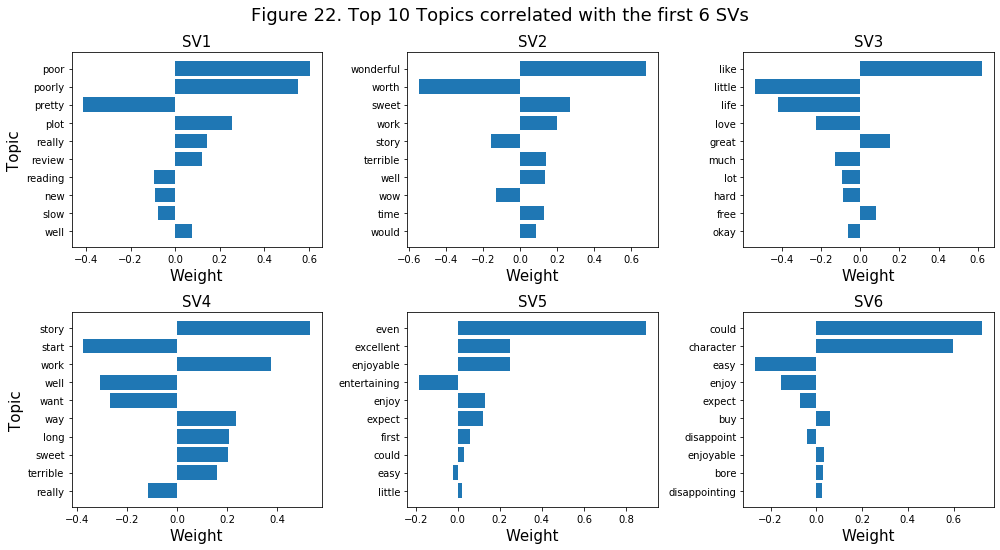

In [36]:
utils.plot_topics(Vt,feature_names, f_num=22)

- For the first singular vector SV1, the terms *poor, poorly, plot, really, review, well* are positively correlated with the SV1, while *pretty, reading, new, slow* are negatively correlated. This feature expressed poorly written (not pretty) E-book.

- For SV2, the terms *wonderful, sweet, work, terrible, well and time* are positively correlated with SV2. However, *worth, story and wow* are negatively correlated with SV2. It seems like wonderful and sweet plot are positively correlated with the SV2.

- For SV3, the terms *like, great and free* is positively correlated with SV3 which corresponds to a positive reviews.
- For SV4, the terms *story, work, way, long, sweet, terrible* are positively correlated with SV4. Stories with long plot may be clumped on the direction of SV4.
- For SV5, the terms *even, excellent, enjoyable, enjoy, expect, first, could* are positively correlated with SV5. This feature expressed e-books with enjoyable content. 
- For SV6, the terms *could, character, buy, bore, disappointing* are positively correlated with SV6 while the terms *easy, enjoy and expect* are negatively correlated with it. These feature expressed the e-books with boring characters or content. 


### VI.III.b Clustering

In [37]:
X_new, y = utils.reduce_tfidf_matrix(k, tfidf, feature_names, df1)

#### K-Means

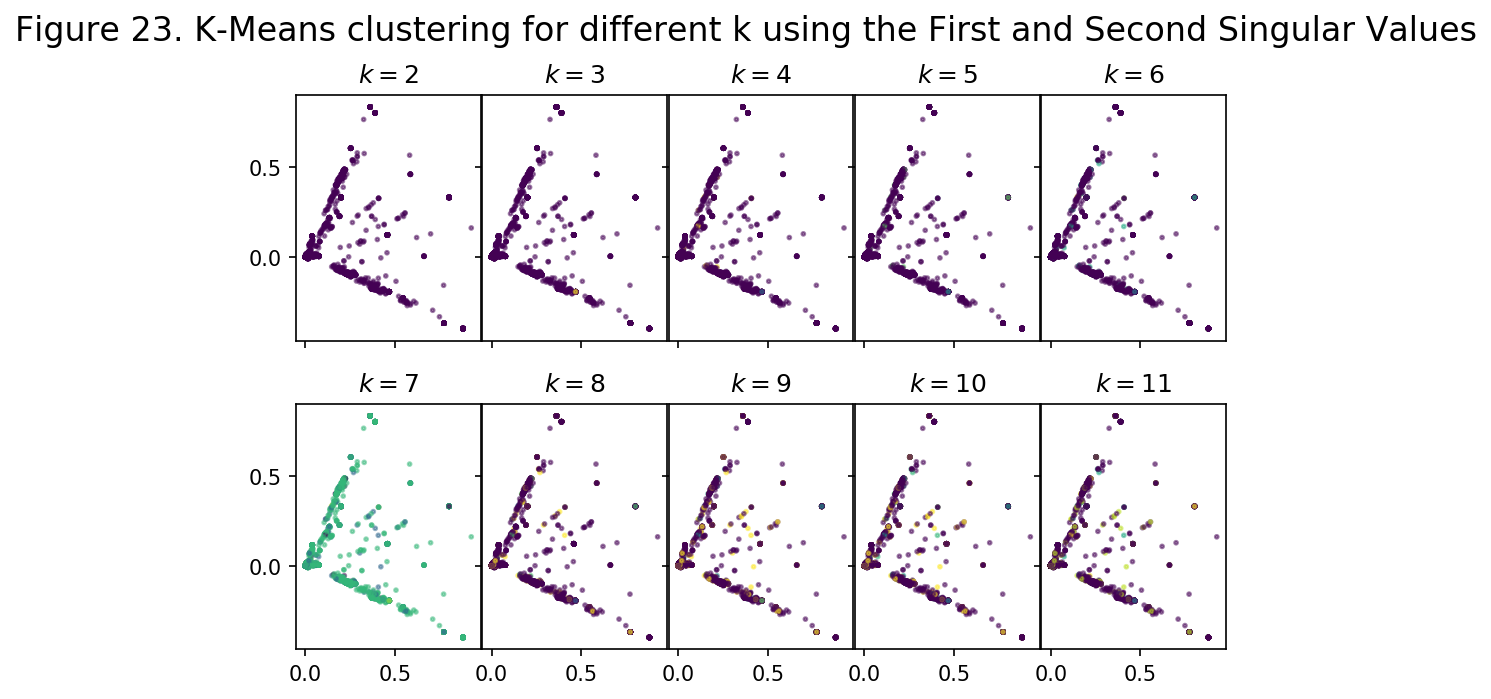

In [38]:
# plot clusters
utils.kmeans_cluster_search(X_new.to_numpy())

Figure 23 shows the clusters using K-means for k equals to 2-11. The cluster groups are not nicely separated. Even with k=2, the samples between the 2 groups are imbalanced. Even after k > 6, we see more groups but samples within the cluster were still not compact. To check what number of cluster to use, we compute internal and external validation metrics.

In [39]:
# Get cluster metrics
res_doc = utils.cluster_range(X_new, KMeans(random_state=1337), 2, 11, 
                         actual=y)

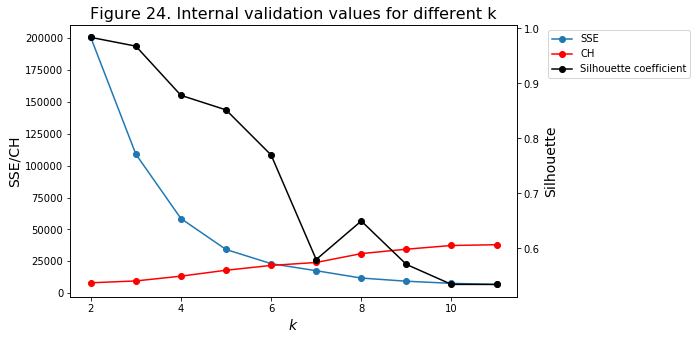

In [40]:
utils.plot_internal(res_doc['inertias'], res_doc['chs'], res_doc['scs'])

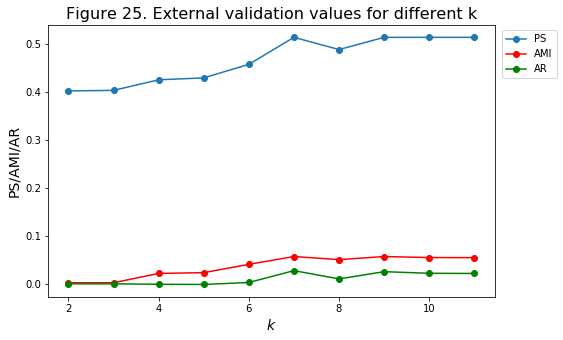

In [41]:
utils.plot_external(res_doc['ps'], res_doc['amis'], res_doc['ars'])

Based on our computation for internal validation k = 3 is the optimal number of clusters. The highest drop in the sum of squared error (blue line) in Figure 24 is at k =3. Furthermore, increasing (k > 3), decreases Silhouette scores which means we have poor clustering quality. 
We also computed the external validation metrics shown in Figure 25. Increasing k seems to make clustering a little better. However, we wanted a smaller groups in the analysis, thus we would primarily follow `k=3` from our internal validation metric.

Below we then applied k=3 on our derived tfidf matrix from our text data. We will then use the cluster labels from the K-means implementation in the prediction modeling on the next analysis.
To understand the latent patterns and information derived within each cluster group, we plot each word vector in the word cloud below.

In [42]:
# using the n_clusters=3, implement KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=1337)
y_kmeans = kmeans.fit_predict(X_new)

# save a new dataframe to be used in the modeling later
X_kmeans = X_new.copy()
X_kmeans['y_kmeans'] = y_kmeans


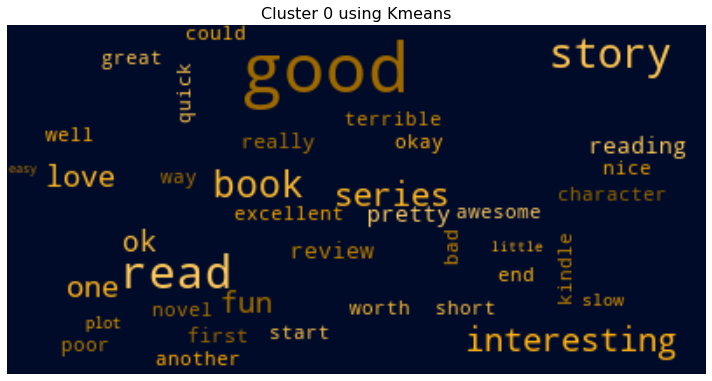

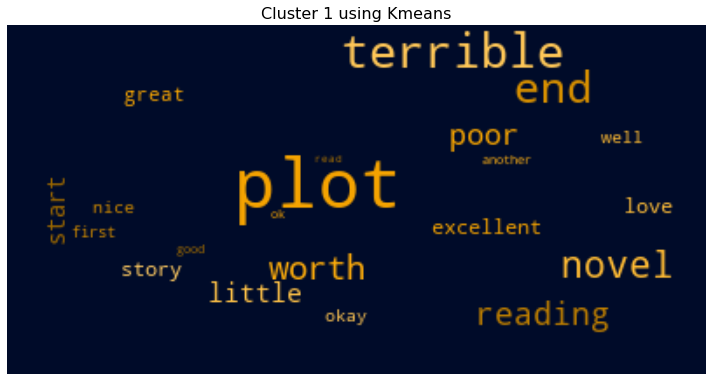

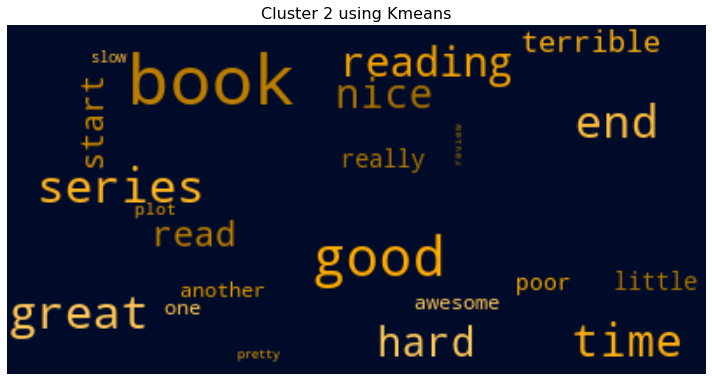

In [43]:
utils.plot_word_cloud(X_kmeans, k_cluster=3, label_col='y_kmeans',
                      model='Kmeans')

### Wordcloud cluster description

With a K-Means clustering model with k = 3 we can describe the 3 groups of clusters above with the following:

- Cluster 0 above highlights words that gravitate towards a stronger positive outlook. This can be observed as a group of words generally given by reviewers who are providing lighter and more encouraging feedback.

- Cluster 1 above highlights words that gravitate stronger towards a more negative outlook. The words found in this cluster can be generally decscribed as given by reviewers who discourage other customers from buying certain books which may contain terrible plots or very long storylines.

- Cluster 2 above highlights words that gravitate towards an acceptable outlook. These words are given by reviewers who can be described as merely satified but couldn't be said to be negative nor extremely positive.

#### Ward's Agglomerative Clustering

We also applied Ward's agglomerative clustering in our data. Since our data is quantitative (not binary), Ward's method is appropriate in this case.

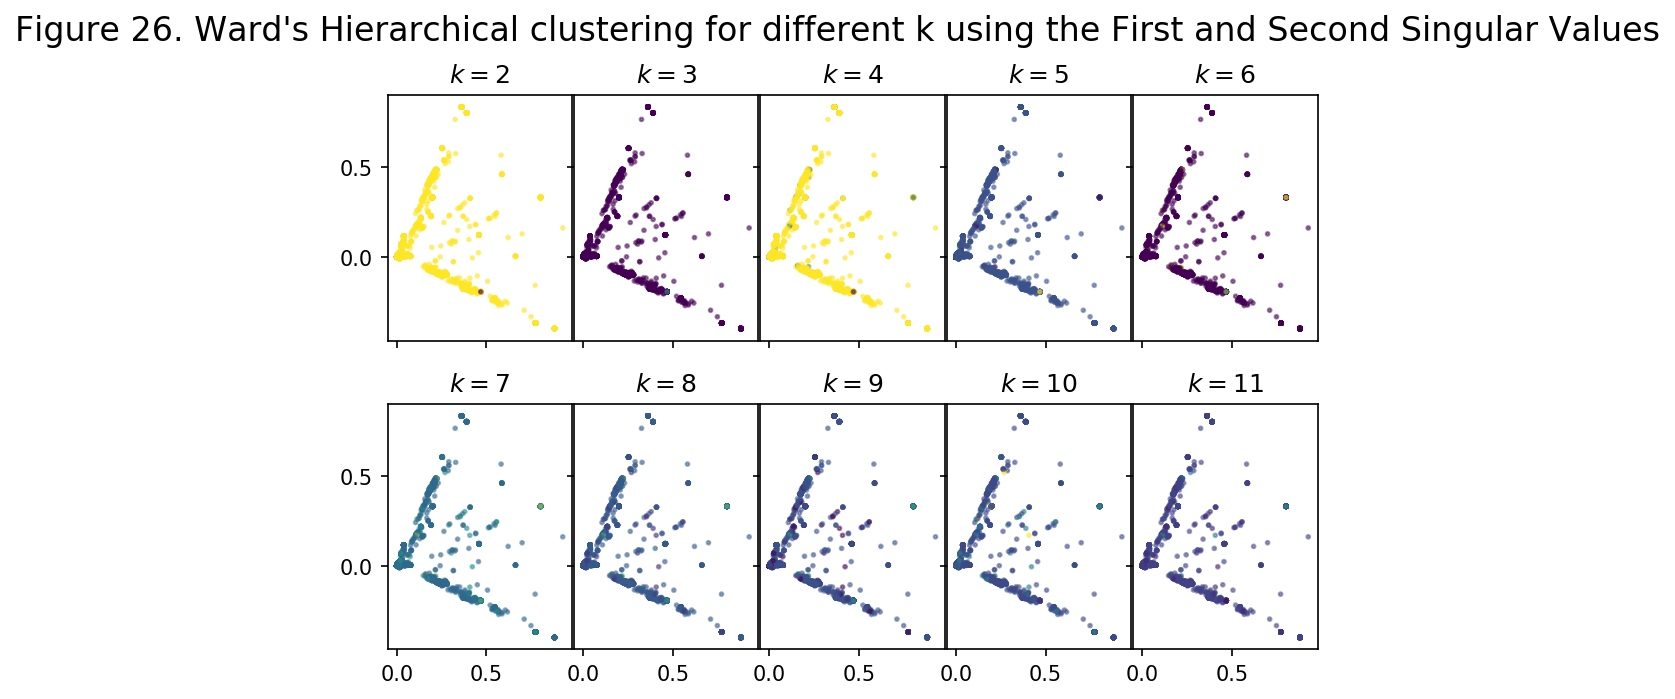

In [44]:
utils.ward_cluster_search(X_new.to_numpy())

Figure 26 shows the clustering using Ward's agglomerative clustering for number of cluster `k` equals 2 until 11. As observed, samples within the clusters are highly imbalanced. This is similar to what we observed when we used K-means. For k=2, the yellow cluster group dominates the space. Even after we increase k, the clusters are not compact.


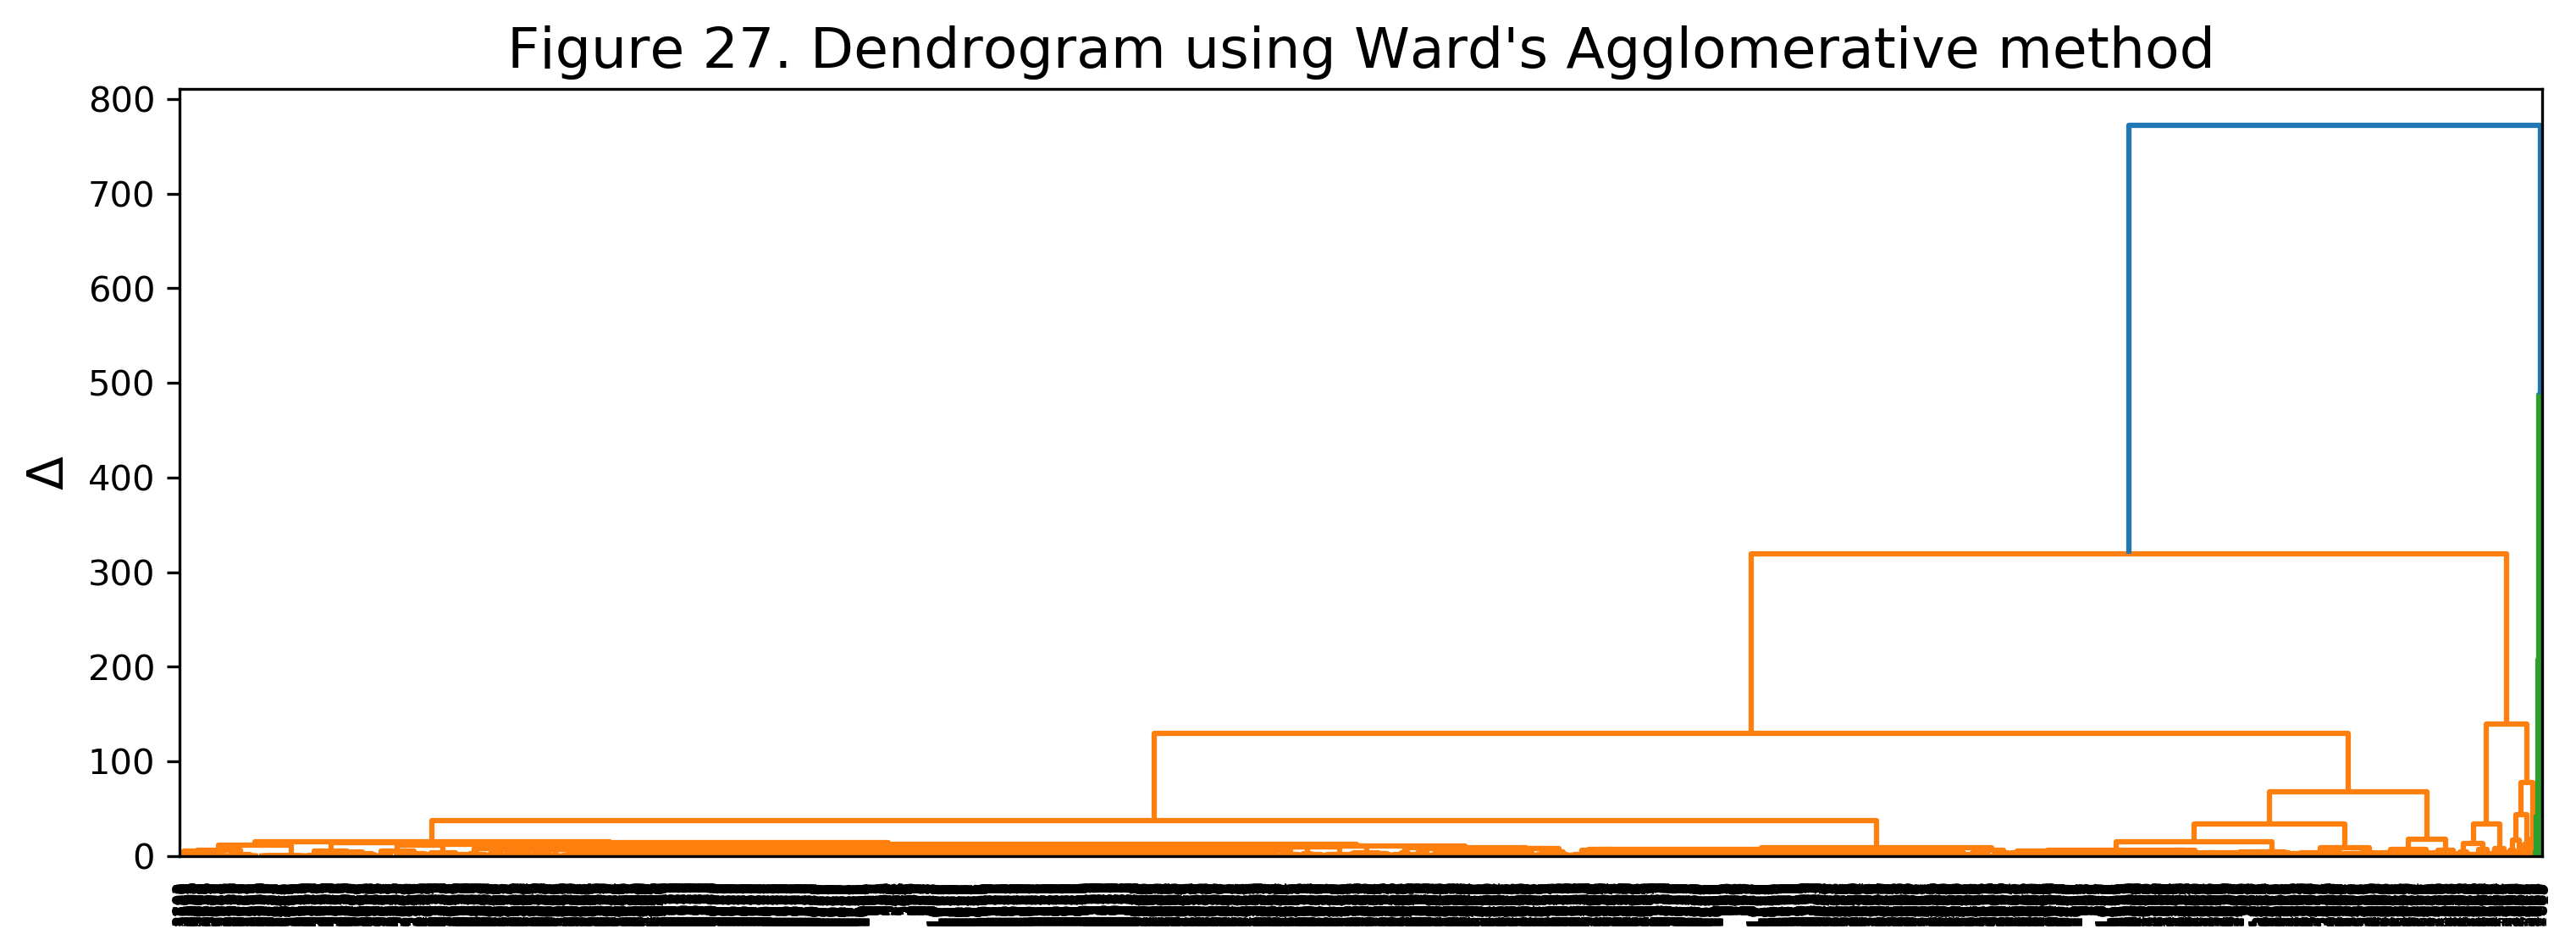

In [45]:
Z = utils.plot_dendrogram(X_new.to_numpy(), f_num=27)

Figure 27 below shows the dendrogram. A dendrogram is a branching diagram that represents the relationships of similarity among a group or cluster of entities. Since we have a big sample, our plot does not look good. We can improve our dendrogram using the truncated version below (Figure 28).

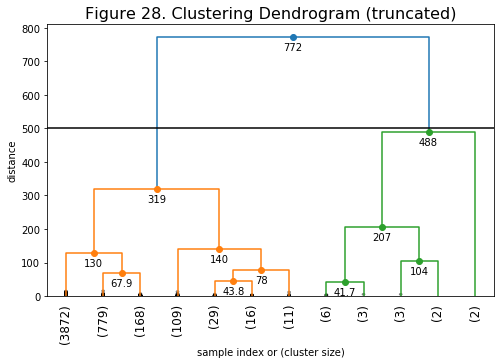

In [46]:
utils.fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=500,  # plot a horizontal cut-off line
)

The dendrogram looks better now. The values in the x-axis (bottom) represents the number of samples that falls within that branch. As seen, most of our data are clustered together in the orange group. Looking at the truncated dendrogram, we would choose k as small as possible (parsimonious). Our horizontal cut-off line is at 500, which leaves us with 2 cluster groups. The samples within the 2 clusters were already highly imbalance (orange and green). Again, the samples in the green cluster is too small relative to the orange group. With k=3, the number of samples in the third clusters would just be 2. Thus, we choose k=2 as our optimal k.


We then applied k=2 on our derived tfidf matrix from our text data. The cluster labels resulted from our implementation of Ward's agglomerative clustering will be used in the next analysis. To understand the latent patterns and information derived within each cluster group, we plot each word vector in the word cloud below.

In [47]:
# with n_cluster=2, implement Ward's agglomerative clustering
agg = AgglomerativeClustering(n_clusters= 2)
y_ward = agg.fit_predict(X_new)

# save a new dataframe to be used in the modeling later
X_ward = X_new.copy()
X_ward['y_ward'] = y_ward

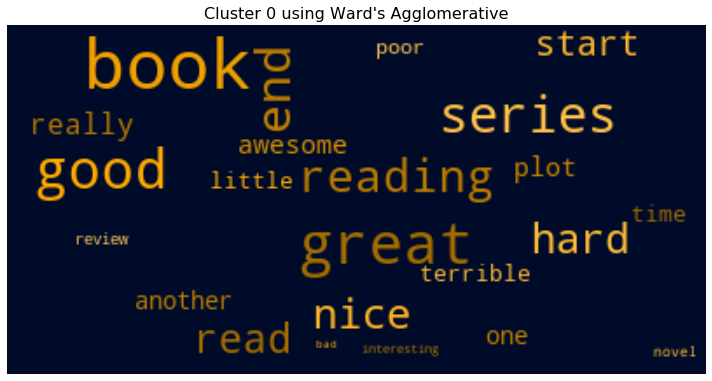

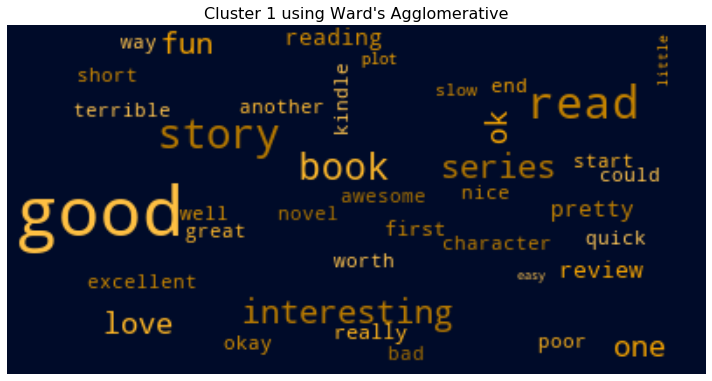

In [48]:
utils.plot_word_cloud(X_ward, k_cluster=2, label_col='y_ward',
                model="Ward's Agglomerative")

### Wordcloud cluster description

With a Ward's clustering model with k = 2 we can describe the 2 groups of clusters above with the following:

- Cluster 0 above highlights words that gravitate towards a stronger positive outlook. This can be observed as a group of words generally given by reviewers who are providing lighter and more encouraging feedback.

- Cluster 1 on the other hand, highlights words that gravitate towards an acceptable outlook. These words are given by reviewers who can be described as merely satified but couldn't be said to be negative nor extremely positive.

### VI.III.c Predicting Sentiments

The main goal of this project is to predict sentiments from vectorized text data (derived from tfidf vectorization) and `helpful_votes`. If successful, the model can predict the sentiments of buyers from a large text of reviews even without having the star rating as "quantitative sentiment score" on the purchased product.

By automatically classifying the sentiments behind text reviews or even comments posted in social media and more, businesses can make better and more informed decisions. We added `helpful_votes` in the analysis to predict the sentiment. This can also corresponds to number of likes from social media posts which from our EDA in the previous section, is correlated with star-rating.

We will use support vector machine (SVM) to predict the sentiment of the data sample. Again, we used SVM due to the fact that it is effective in handling high dimensional spaces. For simplicity, we only used the default hyperparameters.

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#### Model 1: Text Reviews + Helpful score as features

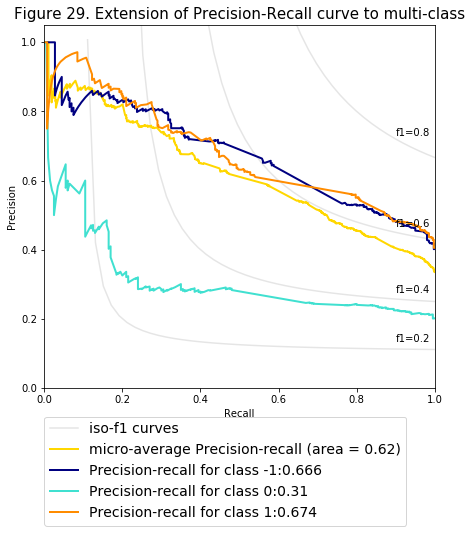

In [50]:
utils.classifier_model(X_new, y, 29)

#### Model 2: Text Reviews + Helpful score + K-means Label as Features

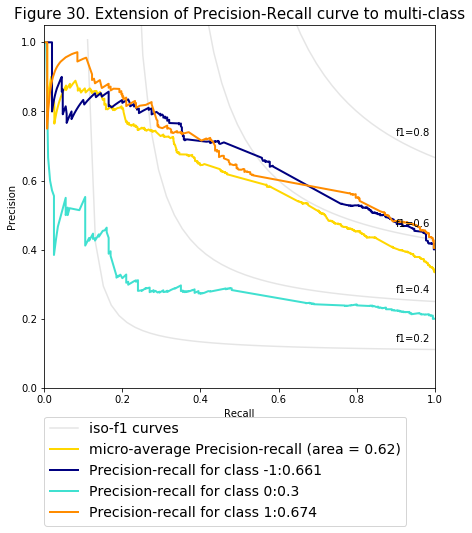

In [51]:
utils.classifier_model(X_kmeans, y, 30)

#### Model 3: Text Reviews + Helpful score + Ward's Agglomerative Cluster Labels as Features

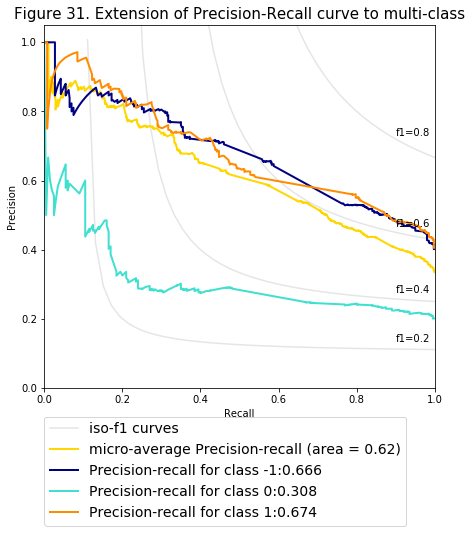

In [52]:
utils.classifier_model(X_ward, y, 31)

The benchmark model, Model 1, used `review_headline` and `helpful_votes` to predict sentiments of customer. The micro-average precision-recall score is 62% for the overall sentiments (positive, neutral and negative). For class -1 (negative), model 1 had a precision-recall score 66.8%, 30.8% for class 0 (neutral) and 67.5% for class 1 (positive).

When we added the cluster labels resulted from the implementation of KMeans and Ward's agglomerative clusterings, the performance of our models did not improve. The "latent pattern/information" that can be found by clustering our data did not contribute on the performance of the classifier model. Using raw tfidf matrix derived from text reviews and helpful votes were sufficient features to obtain an average precision score of 62%. 

Interestingly, the precision for class 0 (neutral) was only half of the precision of classes -1 and 1. This can be because our model was trained to a small sample of neutral reviews. Again, we had 2000 samples for positive and negative sentiment classes while neutral sentiment class was just 1000 samples.

We think that our cluster labels did not improve model's performance due to poor quality of clustering of our samples. We believe the model can still improve if we have more samples in our dataset.

# VII. Conclusion

We have discovered that the years 2010-2013 are where sales of E-books started to increase rapidly. The rise of smartphone usage and the appearance of 64-bit powered phones have started to appear in 2013 thus explaining the high amount of sales in 2013. We have also found out that the Author **Suzanne Collins** has consistently topped the charts in 2011 to 2013 while still being in the top 10 in 2010. The year 2012 has seen a spike in sales of books from the Author **E.L. James**. 

It can be inferred that books that have entered the top 10 have a higher probability of receiving a film adaptaion in a couple years after they reach the Amazon top list. However, books that have reached the number one spot based on ratings and number of purchases are almost automatically given a film adaptation. It seems that when we scrutinize the top charts based on EDA the books that consistently reach the top 10 are **fictional books** with the occasional mix of non-fiction books but it can be observed that the chart is consistently topped by a fictional book. 

We have also been able to find common words that resonate with positive, negative and neutral sentiments. We inferred that customers loved stories when the contents are interesting, unpredictable, enjoyable, and entertaining. Contents with romance and mystery also correlate with positive sentiments from readers. When stories have twist and unexpected clear endings, they tend to form lasting memories for readers. The study confirmed that readers get bored with predictable plots and may dislike books with confusing and boring endings.

KMeans and Ward's agglomerative methods were performed to capture latent information between clusters. We chose 3 clusters for K-means and 2 for Ward's clustering. We found out that K-means clustering with k = 3 provides us 3 clusters that roughly translates to 3 groups that represents positive review words, negative review words and neutral review words. Though the model was able to group these words with similar context considerable noise is still present as there are some words that are mixed in other categories. We also found out that Ward's clustering with k = 2 provides us with 2 clusters that roughly translates to 2 groups that represents positive review words and neutral review words. Ward's method did not outperform K-means clustering in terms of grouping performance, though there are less clusters, the nuances contained within the data has been lost considerably and more noise has emerged from the groupings.

Lastly, the latent pattern/information that can be found by clustering our data did not contribute on the performance of the classifier model. Adding cluster labels from our clustering implementation did not increase precision scores for each of the three sentiments. We think that our cluster labels did not improve model's performance due to poor quality of clustering of our samples. We believe the model can still improve if we have more samples in our dataset.

# VIII. Recommendation

1. **What makes a book sell?**

    Fictional books seem to take the spotlight when it comes to Amazon E-book sales, there are occasional mix-ins of non-fictional books although based on EDA the top chart is always filled by a Fictional Title a famous example is the book series by Suzanne Collins called the `The Hunger Games`. The researchers recommend that authors yearning to make good sales figures on their literary work to focus on writing Fictional type books.


2. **Turn books to movies**

    Books that reach the top 10 best sellers based on rating and number of sales are able to get a higher probability of getting a film adaptation. Reaching the top 3 increases the chances and topping the chart almost guarantees a sure contract for a film adaptation. This can be observed with titles like `The Hunger games series`, `50 shades of grey series` or even non-fictional titles like `Unbroken`. The researchers recommend that authors who are aiming to get a film adaptation first make a book that can reach the top 10 chart for ratings and sales figures to be able to gain a higher chance of getting a film adaptation.


3. **E-books still not taking the center stage**

    Based on research, E-books are still not taking the center stage of consummable text media. 72% of adults in the United States are still sticking to traditional printed media.[[14]](https://www.tonerbuzz.com/blog/paper-books-vs-ebooks-statistics/) The researchers highly recommend authors to produce two versions of their literary work, one in print and one in E-book format. This way, the book will still be able to hit both markets and maximize profits. In the United States Print media may prevail over electronic media, but it can be speculated that countries that don't have direct shipping may prefer to download E-books instead therefore this market is still covered by producing a digital version.


4. **Stories with clear, unexpected, and exciting plots are correlated with positive sentiments**
    
    When plots have twist and unexpected clear endings, they tend to form a lasting memories for readers. The study confirmed that readers get bored with predictable plot and may dislike books with confusing and boring endings. The researchers recommend that authors and story makers who are still starting in their careers to craft narratives with twists and exciting climax that will make readers engaged in the story.
    

5. **Increase Data Quality and Quantity to improve Model Accuracy**
    
    This study is provided with limited computational power thus we the researchers had to truncate the data considerably to be able to utilize available resources. Increasing the quantity of data will increase our model's accuracy as we will be able to add more nuance in the model's analytical process. Increasing the quality of our data will also increase the model's accuracy as we will also be able to reduce noise in our model's analytical process.
    
    
6. **Explore other sentiment analysis techniques to measure sentiment polarity.**
    
    This study only uses stars rating to measure sentiment polarity. There are sophisticated state of the art sentiment analyses used widely. Famous examples are AFINN and NRC which are lexicon based semantic analysis tools. For future studies, one can use these tools to have a more accurate sentiment analysis on text data.

## IX. References

[1] Wikipedia contributors. (2021c, August 21). Latent semantic analysis. Wikipedia. https://en.wikipedia.org/wiki/Latent_semantic_analysis

[2] GeeksforGeeks. (2020, February 23). Clustering in Machine Learning. https://www.geeksforgeeks.org/clustering-in-machine-learning/

[3] Stanford. (2013). CS221. https://stanford.edu/%7Ecpiech/cs221/handouts/kmeans.html

[4] The Pennsylvania State University. (2021). 14.7 - Ward’s Method | STAT 505. PennState: Statistics Online Courses. https://online.stat.psu.edu/stat505/lesson/14/14.7

[5] Wikipedia contributors. (2021b, July 6). Adjusted mutual information. Wikipedia. https://en.wikipedia.org/wiki/Adjusted_mutual_information#Adjustment_for_chance

[6] Shimpi, A. L. (2013, September 10). Apple Announces A7, World's First 64-bit Smartphone SoC. AnandTech. https://www.anandtech.com/show/7304/apple-announces-a7-worlds-first-64bit-smartphone-soc

[7] New Atlas. (2019, December 16). The rise of the smartphone: Mobile technology in the 2010s. https://newatlas.com/mobile-technology/smartphone-history-review-2010-2019/

[8] Wikipedia contributors. (2021a, June 1). Amazon Breakthrough Novel Award. Wikipedia. https://en.wikipedia.org/wiki/Amazon_Breakthrough_Novel_Award

[9] the help book - Google zoeken. (2021). Google. https://www.google.com/search?q=the+help+book&oq=the+help+book&aqs=chrome..69i57j46i512j0i512l8.5173j0j9&sourceid=chrome&ie=UTF-8

[10] the hunger games book 1 - Google zoeken. (2021). Google. https://www.google.com/search?q=the+hunger+games+book+1&oq=the+hunger+games+book+1&aqs=chrome..69i57j46i512j0i512j0i20i263i512j0i512l6.4745j0j9&sourceid=chrome&ie=UTF-8

[11] the girl with the dragon tattoo book 1 - Google zoeken. (2021). Google. https://www.google.com/search?q=the+girl+with+the+dragon+tattoo+book+1&oq=the+girl+with+the+dragon+tattoo+book+1&aqs=chrome..69i57j0i22i30.12530j0j9&sourceid=chrome&ie=UTF-8

[12] Wikipedia contributors. (2021e, September 8). Unbroken: A World War II Story of Survival, Resilience, and Redemption. Wikipedia. https://en.wikipedia.org/wiki/Unbroken:_A_World_War_II_Story_of_Survival,_Resilience,_and_Redemption

[13] Wikipedia contributors. (2021d, September 4). Fifty Shades of Grey. Wikipedia. https://en.wikipedia.org/wiki/Fifty_Shades_of_Grey

[14] Paper Books vs eBooks Statistics, Trends and Facts [2021]. (2021). Toner Buzz. https://www.tonerbuzz.com/blog/paper-books-vs-ebooks-statistics/